<a href="https://colab.research.google.com/github/AyushMathpal/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Data Preparation

In [ ]:
data = pd.read_csv("train.csv", ",")
data.head()

<ipython-input-163-5b1cd68051af>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("train.csv", ",")


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[4.880000e+02 5.435870e+05 8.112450e+05 3.000000e+00 7.271400e+04
  5.000000e+00 3.000000e+00 1.200000e+01 1.510000e+02 1.000000e+02
  1.120000e+02 3.883760e+05]
 [6.480000e+02 6.002240e+05 8.927850e+05 7.000000e+00 9.333500e+04
  4.000000e+00 5.000000e+00 1.300000e+01 2.000000e+02 1.150000e+02
  8.900000e+01 3.671220e+05]
 [3.890000e+02 6.569560e+05 7.966380e+05 6.000000e+00 6.276800e+04
  1.000000e+00 1.000000e+00 1.300000e+01 1.650000e+02 7.300000e+01
  7.900000e+01 4.720810e+05]
 [1.920000e+02 6.173060e+05 7.142140e+05 6.000000e+00 7.979700e+04
  1.000000e+00 1.000000e+01 1.000000e+01 1.920000e+02 6.300000e+01
  1.170000e+02 3.929205e+05]
 [8.980000e+02 5.819500e+05 7.397220e+05 3.000000e+00 1.387150e+05
  1.000000e+00 6.000000e+00 1.400000e+01 1.590000e+02 1.010000e+02
  1.010000e+02 1.100215e+05]], shape=(5, 12), dtype=float32)


In [ ]:
X=tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [ ]:
Y=tensor_data[:,-1]
Y=tf.expand_dims(Y,axis=-1)
print(Y.shape)

(1000, 1)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)] #800
y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)] #800
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [ ]:
model=tf.keras.Sequential([InputLayer(input_shape=(8),),
                          normalizer,
                           Dense(128, activation = "relu"),
                           Dense(128, activation = "relu"),
                           Dense(128, activation = "relu"),
                            Dense(1),
                           ])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanAbsoluteError( ),metrics=RootMeanSquaredError())

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 161343.7969 - root_mean_squared_error: 209972.7969 - val_loss: 81507.6484 - val_root_mean_squared_error: 94034.9922
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 55833.8750 - root_mean_squared_error: 70370.6250 - val_loss: 43209.6289 - val_root_mean_squared_error: 53678.0234
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 41610.3672 - root_mean_squared_error: 52015.6836 - val_loss: 45806.6367 - val_root_mean_squared_error: 56838.3359
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 39973.8008 - root_mean_squared_error: 51118.6953 - val_loss: 40321.5859 - val_root_mean_squared_error: 50200.9805
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 39343.4141 - root_mean_squared_error: 50231.3672 - val_loss: 46156.9414 - val_root_mean_squared_error: 57351.8867
Epoch 6/100
25/25 [==============================] - 0s 5ms/st

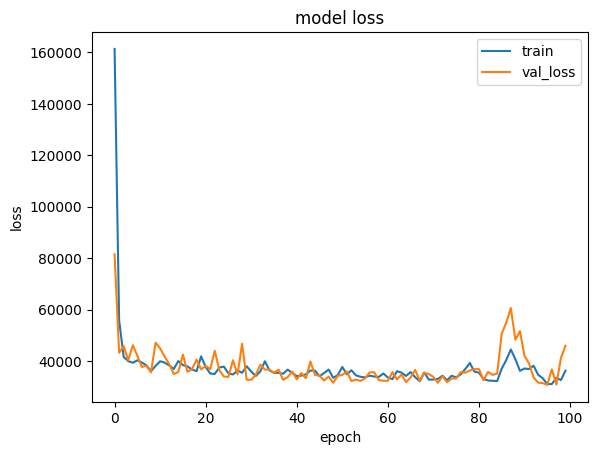

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 52503.1953 - root_mean_squared_error: 63500.2109


[52503.1953125, 63500.2109375]

In [ ]:
model.predict(X_test).shape

4/4 [==============================] - 0s 5ms/step


(100, 1)

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 29ms/step


array([[185884.19]], dtype=float32)

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 30ms/step


array([[185884.19]], dtype=float32)

In [ ]:
y_true=list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 4ms/step
[185884.23, 430696.84, 444140.97, 310497.16, 337069.56, 401472.1, 381409.2, 142704.81, 105619.09, 100314.266, 351249.03, 113589.03, 169006.72, 317631.75, 389847.53, 274710.03, 147980.67, 422534.78, 179515.86, 140611.81, 300412.38, 316898.3, 318856.06, 264467.66, 286966.06, 422332.22, 396040.03, 267827.78, 252654.17, 319734.2, 241086.5, 162440.67, 393162.94, 141522.38, 154705.23, 128393.37, 170094.08, 340907.97, 407526.88, 190187.19, 422055.34, 216554.73, 388350.84, 198998.73, 301656.94, 130175.99, 271469.03, 193564.36, 192892.02, 388866.78, 168584.2, 373509.5, 258232.73, 350123.16, 94243.484, 296915.62, 250042.89, 112752.98, 240463.95, 214270.1, 373833.6, 191153.3, 323950.84, 270806.9, 372521.16, 138939.38, 194571.27, 351071.22, 266565.22, 437603.1, 352192.62, 227829.64, 129010.22, 177060.19, 285995.72, 389216.53, 365038.3, 225243.75, 314304.66, 112505.125, 442625.56, 325045.12, 409416.9, 307901.22, 250035.17, 433445.16, 308718.84, 162

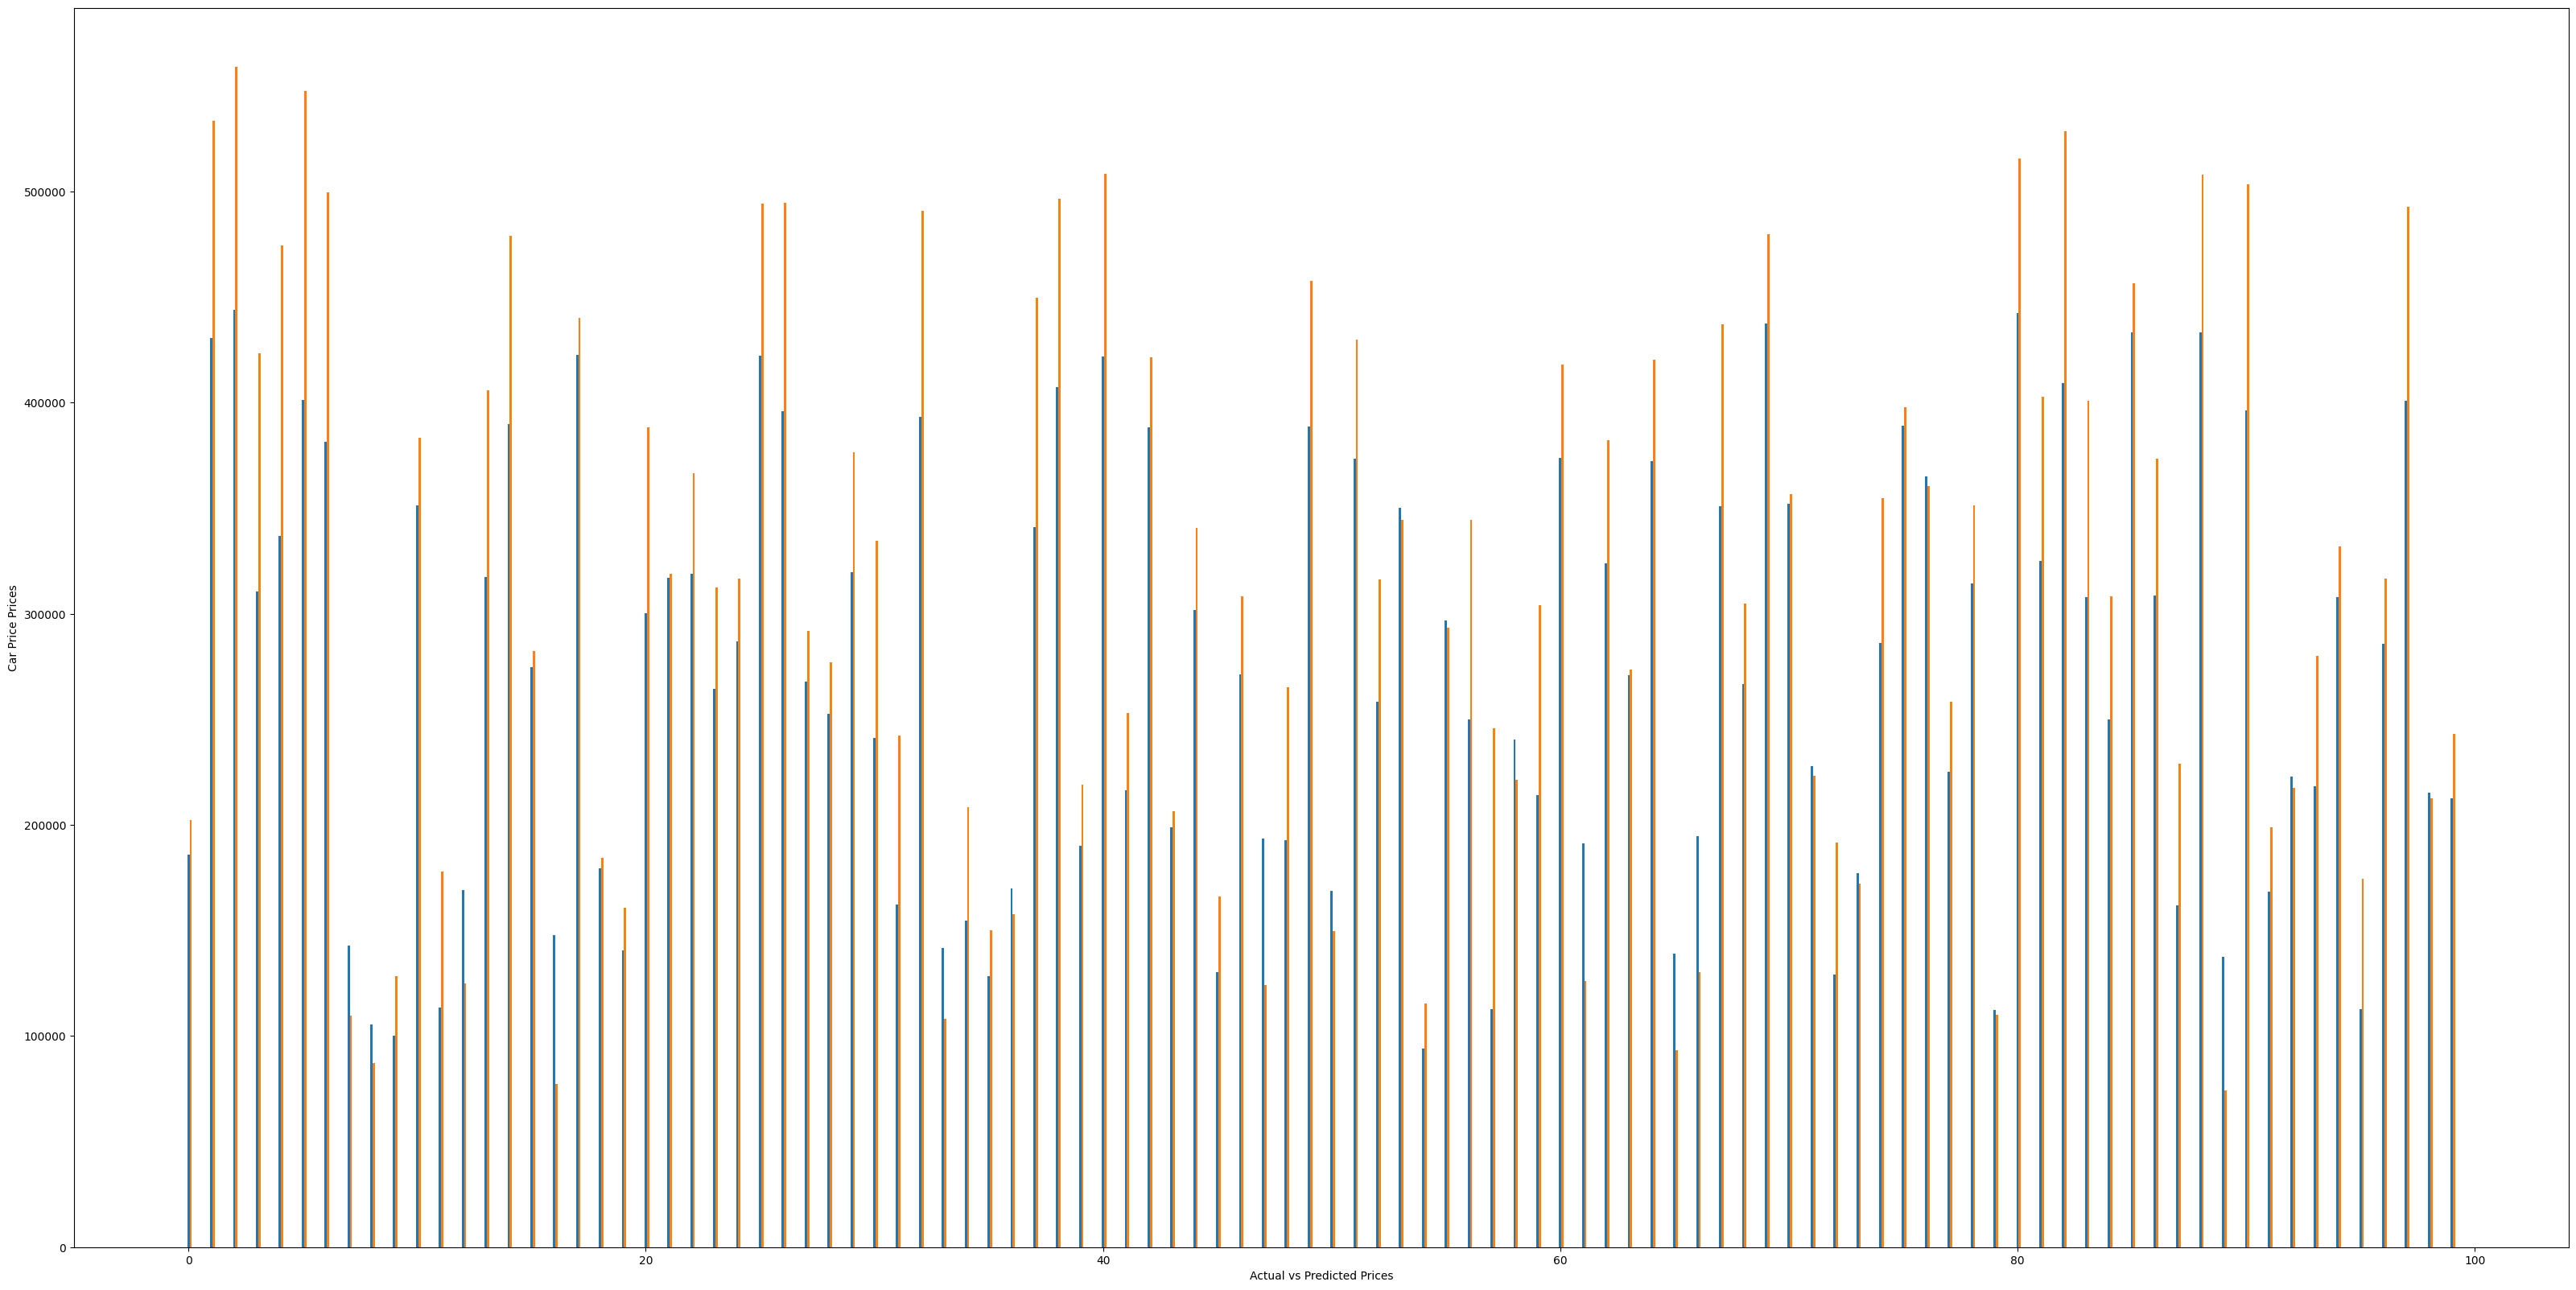

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()